In [2]:
# Task 1: ML Basics - Iris Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [3]:
# Load Dataset
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
# Convert to DataFrame for analysis
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y


In [5]:
# Map target labels to names
df['target_name'] = df['target'].map(dict(enumerate(iris.target_names)))


In [6]:
# Display top records
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target target_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa  


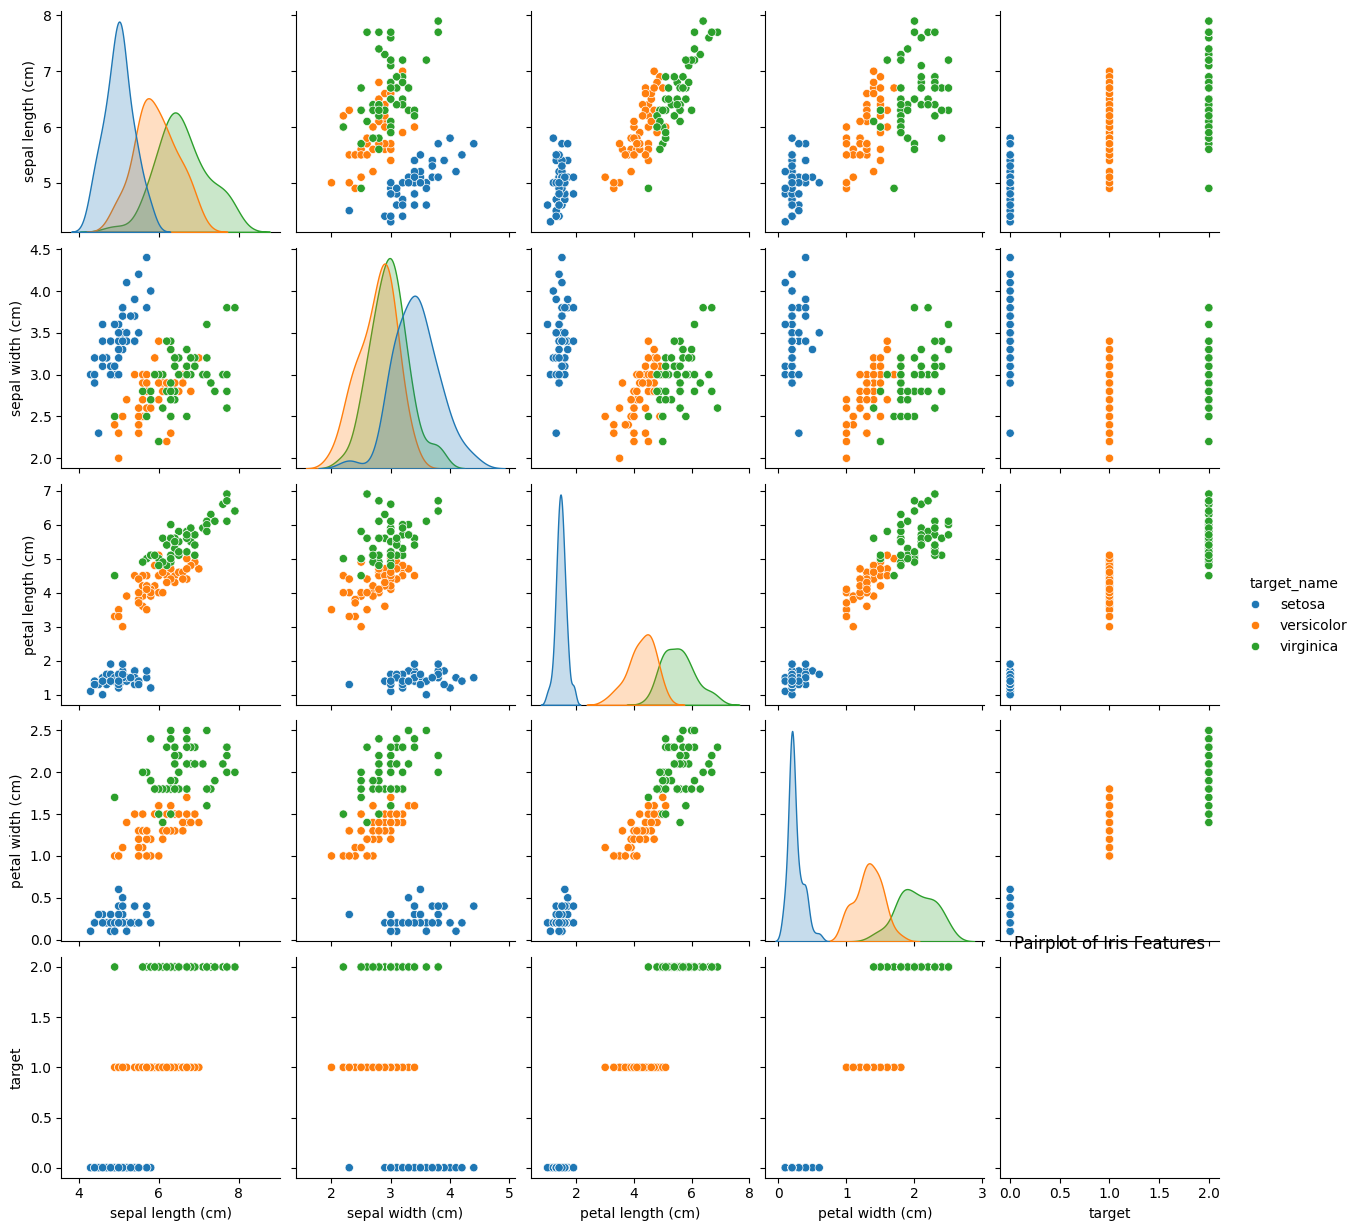

In [7]:
# Basic EDA
sns.pairplot(df, hue='target_name')
plt.title("Pairplot of Iris Features")
plt.show()

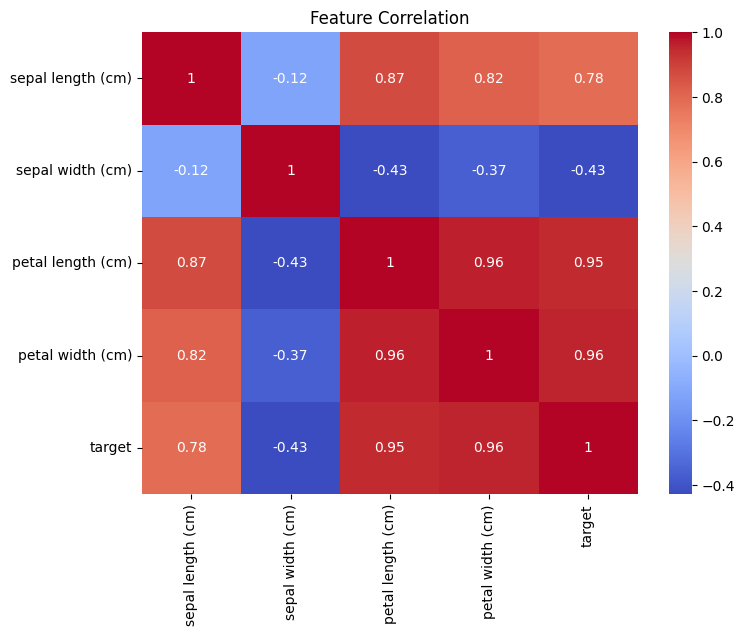

In [8]:
# Feature correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns='target_name').corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [9]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# -------------------- Model 1: Logistic Regression --------------------
log_model = LogisticRegression(max_iter=200)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

In [12]:
# Evaluation
print("🔹 Logistic Regression")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))


🔹 Logistic Regression
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [13]:
# -------------------- Model 2: K-Nearest Neighbors --------------------
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)


In [14]:
# Evaluation
print("\n🔹 K-Nearest Neighbors (k=3)")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


🔹 K-Nearest Neighbors (k=3)
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

